<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/Transfer-Learning/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning using mobileNetV2

In [ ]:
pip install --upgrade tensorflow tensorflow-hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 829.2 kB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.19.1 which is incompatible.


In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
import tf_keras
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


In [ ]:
from google.colab import files
files.upload()

Saving Screenshot 2025-12-31 105703.png to Screenshot 2025-12-31 105703 (1).png


{'Screenshot 2025-12-31 105703 (1).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xf0\x00\x00\x01\xbe\x08\x06\x00\x00\x00\xf5\x1c0\xfb\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^\x84\xfd\xd9\xafmI\xba\xdd\x87\xfd"b\xb6\xab_k\xf7\xa7\xc9\xd3dW\x95UYU\xb7\xe1\xe5\x15EJ"D\xbfH\x96a\xfb\x1az\xb3`\x1b\x94\xdc\x00\x82-\x91rC\xf9\xa1\xfe+\x1b\x90\rI0LQ\xbc\xbc\xf7\x16+\xb3*+Of\x9e~\xf7{\xf5k\xf6sF\xf8\xe1\x8b\xb5O\x926\xe0\x05l\x9c\xcc\xd3\xec\xbd\xd6\x9c1#\xc67\xbe1\xc6\xa76\x8b\xdf;c\x02\xa2 \xc0\x18CYf\xac\x96K\x8a\xdd\x06\xe7\x1c(\x8b\xb5\xe0\x1c\x18c\x08\x82\x00\xa35q\x18a\x9d%\xdb\xed\x88\xa2\x98\xfe`@\x12\xc7\x00t]G\xdb\xb6\xb8\xae\xa1\xae*\xba\xb6C9\xa8\xeb\x1ac\x14J\xc9\x97\xd6\x86\xae\xb54uM:\xe8\xd1\x99\x80\xa2i\x08\xe3\x90A\xbfO\xdbZ\xba\xae\xa3\xeb,\x1a0Zc\x8c\xfc|\xa3\x03\x946\x80\xa3\xeb,a\x18\xa0\xb5\xa6iZ\xda\xb6%\x0cC\xa2(\xc2\x18\x83R\n

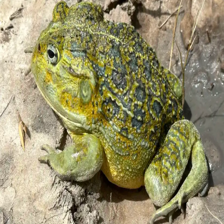

In [ ]:
bullFrog=Image.open("Screenshot 2025-12-31 105703.png").resize(IMAGE_SHAPE)
bullFrog = bullFrog.convert("RGB")
bullFrog

In [ ]:
#scaling
bullFrog=np.array(bullFrog)/255.0
bullFrog.shape

(224, 224, 3)

In [ ]:
bullFrog[np.newaxis, ...].shape
#we added one for dimension for no of images cz they go in batches rather single

(1, 224, 224, 3)

In [ ]:
result=classifier.predict(bullFrog[np.newaxis, ...])
result.shape
#batch_size,op_classes_nums

1/1 [==============================] - 1s 572ms/step


(1, 1001)

In [ ]:
result

array([[ 0.28504232,  2.398548  , -0.21525477, ...,  1.240676  ,
         0.14624774, -0.60695523]], dtype=float32)

In [ ]:
predicted_label_index=np.argmax(result)
predicted_label_index

np.int64(33)

In [ ]:
from google.colab import files
files.upload()


Saving ImageNetLabels.txt to ImageNetLabels (1).txt


{'ImageNetLabels (1).txt': b"background\ntench\ngoldfish\ngreat white shark\ntiger shark\nhammerhead\nelectric ray\nstingray\ncock\nhen\nostrich\nbrambling\ngoldfinch\nhouse finch\njunco\nindigo bunting\nrobin\nbulbul\njay\nmagpie\nchickadee\nwater ouzel\nkite\nbald eagle\nvulture\ngreat grey owl\nEuropean fire salamander\ncommon newt\neft\nspotted salamander\naxolotl\nbullfrog\ntree frog\ntailed frog\nloggerhead\nleatherback turtle\nmud turtle\nterrapin\nbox turtle\nbanded gecko\ncommon iguana\nAmerican chameleon\nwhiptail\nagama\nfrilled lizard\nalligator lizard\nGila monster\ngreen lizard\nAfrican chameleon\nKomodo dragon\nAfrican crocodile\nAmerican alligator\ntriceratops\nthunder snake\nringneck snake\nhognose snake\ngreen snake\nking snake\ngarter snake\nwater snake\nvine snake\nnight snake\nboa constrictor\nrock python\nIndian cobra\ngreen mamba\nsea snake\nhorned viper\ndiamondback\nsidewinder\ntrilobite\nharvestman\nscorpion\nblack and gold garden spider\nbarn spider\ngarden s

In [ ]:
image_Labels=[]
with open("ImageNetLabels.txt","r") as f:
  image_Labels=f.read().splitlines()
image_Labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_Labels[predicted_label_index]

'tailed frog'

so till now we basically used to the model checked it just like joblib and pickle now we will use it to detect our flower images

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
!ls


 datasets		   sample_data
'ImageNetLabels (1).txt'  'Screenshot 2025-12-31 105703 (1).png'
 ImageNetLabels.txt	  'Screenshot 2025-12-31 105703.png'


In [ ]:
!ls datasets


flower_photos  flower_photos_archive


In [ ]:
!ls datasets/flower_photos


flower_photos


In [ ]:
import pathlib
#it helps in performong several fnc required for data augemntaion
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('**/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('**/roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16903172207_2cd7aca66a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3742155164_14b557a51c_n.jpg')]

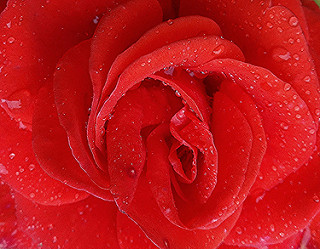

In [ ]:
import PIL
PIL.Image.open(str(roses[1]))

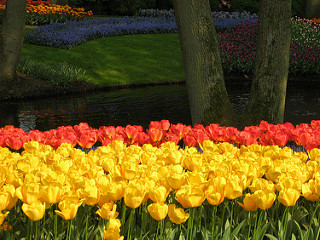

In [ ]:

tulips = list(data_dir.glob('**/tulips/*.jpg'))
PIL.Image.open(str(tulips[1]))

In [ ]:
flower_images_dict = {
    'roses': list(data_dir.glob('**/roses/*.jpg')),
    'daisy': list(data_dir.glob('**/daisy/*.jpg')),
    'dandelion': list(data_dir.glob('**/dandelion/*.jpg')),
    'sunflowers': list(data_dir.glob('**/sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('**/tulips/*.jpg')),
}

In [ ]:
flower_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[174, 199, 255],
        [176, 200, 254],
        [177, 202, 252],
        ...,
        [184, 188, 207],
        [205, 205, 223],
        [214, 213, 229]],

       [[174, 199, 255],
        [176, 200, 254],
        [177, 202, 252],
        ...,
        [206, 215, 229],
        [213, 222, 235],
        [215, 225, 235]],

       [[174, 200, 254],
        [177, 201, 255],
        [178, 203, 253],
        ...,
        [215, 221, 234],
        [212, 221, 231],
        [208, 219, 227]],

       ...,

       [[ 80, 175, 155],
        [ 77, 169, 150],
        [ 76, 169, 148],
        ...,
        [220, 221, 235],
        [220, 220, 236],
        [220, 220, 236]],

       [[ 87, 174, 160],
        [ 83, 168, 153],
        [ 85, 169, 151],
        ...,
        [220, 221, 235],
        [220, 221, 235],
        [220, 220, 236]],

       [[ 82, 173, 152],
        [ 80, 171, 150],
        [ 78, 167, 148],
        ...,
        [220, 220, 236],
        [220, 220, 238],
        [220, 220, 238]]], dtype=uint8)
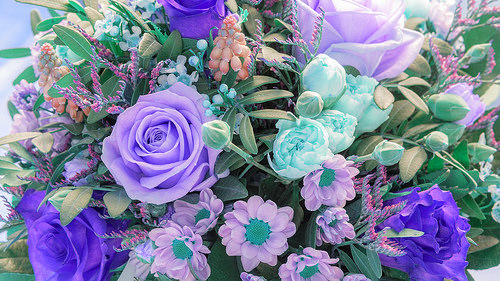

In [ ]:
img = cv2.imread(flower_images_dict['roses'][0])
img

In [ ]:
img.shape

(281, 500, 3)

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
x,y=[],[]
for flower_name,images in flower_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
for flower_name,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(image)
    resized_img=cv2.resize(img,(224,224))
    x.append(resized_img)
    y.append(flower_label_dict[flower_name])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

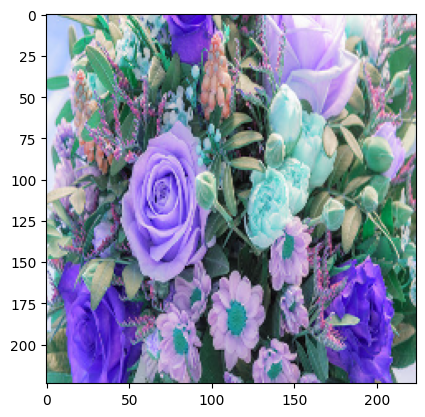

In [ ]:
plt.imshow(x[0])

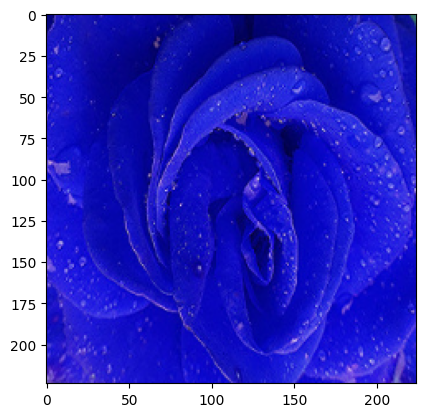

In [ ]:
plt.imshow(x[1])

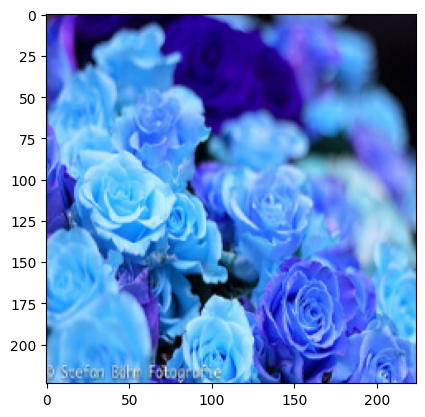

In [ ]:
plt.imshow(x[3])

In [ ]:
predicted=classifier.predict(np.array([x[0],x[1],x[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 378ms/step


array([722, 795, 795])

In [ ]:
image_Labels[722]

'pillow'

In [ ]:
image_Labels[795]

'shower curtain'

till now we used classification basically the entire model now we will use some layers of it which will work as feature extractor

now the feature vector detects about 1280 fetures which is further used classsify into 5 categoruies of the flowers

In [ ]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)
#trainable false basically means that we are freezing weights and bias of each layers

In [ ]:
num_of_flowers=5
model=tf_keras.Sequential([
    pretrained_model_without_top_layer,
    tf_keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


model.compile(

      optimizer="adam",

      loss=tf.keras.losses.SparseCategoricalCrossentropy

      (from_logits=True),

      metrics=['acc'])



model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
 1/86 [..............................] - ETA: 0s - loss: 1.9482 - acc: 0.2188

86/86 [==============================] - 2s 19ms/step - loss: 0.7985 - acc: 0.7028

Epoch 2/5
86/86 [==============================] - 2s 19ms/step - loss: 0.4163 - acc: 0.8517

Epoch 3/5
86/86 [==============================] - 2s 19ms/step - loss: 0.3264 - acc: 0.8895

Epoch 4/5
86/86 [==============================] - 2s 19ms/step - loss: 0.2682 - acc: 0.9106

Epoch 5/5
86/86 [==============================] - 2s 19ms/step - loss: 0.2305 - acc: 0.9266



----------------------------------------------------------------------

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.3703 - acc: 0.8682
[0.37029528617858887, 0.8681917190551758]

now we needed very less epochs due to the fact that we used pretrained and less epochs still as high as before accuracy or maybe better